you can install stormevents with `pip install stormevents`

In [19]:
import geopandas
import pandas
import shapely
from matplotlib import pyplot
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize

from stormevents import StormEvent

countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# storm events

#### `nhc_storms()` returns a dataframe of all storms that the National Hurricane Center lists on their public website
https://stormevents.readthedocs.io/en/latest/nhc.html#stormevents.nhc.storms.nhc_storms

In [20]:
from stormevents.nhc import nhc_storms

nhc_storms()

,name,class,year,basin,number,source,start_date,end_date
nhc_code,,,,,,,,
AL021851,UNNAMED,HU,1851,AL,2,ARCHIVE,1851-07-05 12:00:00,1851-07-05 12:00:00
AL031851,UNNAMED,TS,1851,AL,3,ARCHIVE,1851-07-10 12:00:00,1851-07-10 12:00:00
AL041851,UNNAMED,HU,1851,AL,4,ARCHIVE,1851-08-16 00:00:00,1851-08-27 18:00:00
AL051851,UNNAMED,TS,1851,AL,5,ARCHIVE,1851-09-13 00:00:00,1851-09-16 18:00:00
AL061851,UNNAMED,TS,1851,AL,6,ARCHIVE,1851-10-16 00:00:00,1851-10-19 18:00:00
...,...,...,...,...,...,...,...,...
CP902021,INVEST,LO,2021,CP,90,METWATCH,2021-07-24 12:00:00,NaT
CP912021,INVEST,DB,2021,CP,91,METWATCH,2021-08-07 18:00:00,NaT
EP922021,INVEST,DB,2021,EP,92,METWATCH,2021-06-05 06:00:00,NaT


#### you can then create a new `StormEvent` object that encapsulates the time interval of the storm event
https://stormevents.readthedocs.io/en/latest/stormevent.html#stormevents.stormevent.StormEvent

In [21]:
storm = StormEvent('florence', 2018)
storm

StormEvent(name='FLORENCE', year=2018, start_date=Timestamp('2018-08-30 06:00:00'), end_date=Timestamp('2018-09-18 12:00:00'))

# NHC storm tracks

#### the `.track()` method retrieves a `VortexTrack` object (the NHC BEST track by default) of the storm
https://stormevents.readthedocs.io/en/latest/nhc.html#stormevents.nhc.track.VortexTrack

## `BEST` track

In [22]:
storm_best_track = storm.track()
storm_best_track.data

/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,basin,storm_number,datetime,advisory_number,advisory,forecast_hours,latitude,longitude,max_sustained_wind_speed,central_pressure,...,depth_code,isowave,isowave_quadrant_code,isowave_radius_for_NEQ,isowave_radius_for_SEQ,isowave_radius_for_NWQ,isowave_radius_for_SWQ,extra_values,geometry,track_start_time
0,AL,06,2018-08-30 06:00:00,,BEST,0,12.8,-16.9,20.0,1008.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-16.90000 12.80000),2018-08-30 06:00:00
1,AL,06,2018-08-30 12:00:00,,BEST,0,12.8,-17.9,25.0,1007.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-17.90000 12.80000),2018-08-30 06:00:00
2,AL,06,2018-08-30 18:00:00,,BEST,0,12.8,-19.0,25.0,1007.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-19.00000 12.80000),2018-08-30 06:00:00
3,AL,06,2018-08-31 00:00:00,,BEST,0,13.1,-20.2,30.0,1006.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-20.20000 13.10000),2018-08-30 06:00:00
4,AL,06,2018-08-31 06:00:00,,BEST,0,13.4,-21.4,30.0,1006.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-21.40000 13.40000),2018-08-30 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,AL,06,2018-09-17 12:00:00,,BEST,0,37.8,-82.2,25.0,1008.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-82.20000 37.80000),2018-08-30 06:00:00
166,AL,06,2018-09-17 18:00:00,,BEST,0,38.8,-82.0,25.0,1008.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-82.00000 38.80000),2018-08-30 06:00:00
167,AL,06,2018-09-18 00:00:00,,BEST,0,39.5,-80.5,25.0,1008.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-80.50000 39.50000),2018-08-30 06:00:00
168,AL,06,2018-09-18 06:00:00,,BEST,0,41.3,-76.8,25.0,1007.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-76.80000 41.30000),2018-08-30 06:00:00


(11.33, 43.67)

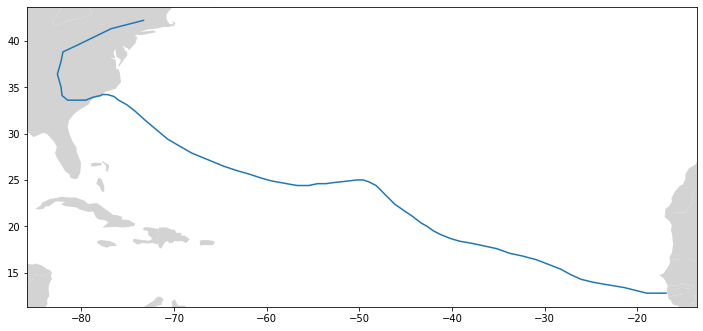

In [23]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

linestring = storm_best_track.linestrings['BEST']['20180830T060000']
axis.plot(*linestring.xy)

map_bounds = (min(linestring.xy[0]), min(linestring.xy[1]), max(linestring.xy[0]), max(linestring.xy[1]))

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

## `OFCL` advisory tracks

In [24]:
storm_advisory_track = storm.track(advisories=['OFCL'])
storm_advisory_track.data

/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,basin,storm_number,datetime,advisory_number,advisory,forecast_hours,latitude,longitude,max_sustained_wind_speed,central_pressure,...,depth_code,isowave,isowave_quadrant_code,isowave_radius_for_NEQ,isowave_radius_for_SEQ,isowave_radius_for_NWQ,isowave_radius_for_SWQ,extra_values,geometry,track_start_time
14,AL,06,2018-08-30 12:00:00,03,OFCL,0,12.8,-17.9,25.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-17.90000 12.80000),2018-08-30 12:00:00
15,AL,06,2018-08-30 15:00:00,03,OFCL,3,12.9,-18.4,25.0,1007.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-18.40000 12.90000),2018-08-30 12:00:00
16,AL,06,2018-08-31 00:00:00,03,OFCL,12,13.2,-20.1,30.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-20.10000 13.20000),2018-08-30 12:00:00
17,AL,06,2018-08-31 12:00:00,03,OFCL,24,13.5,-22.0,35.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-22.00000 13.50000),2018-08-30 12:00:00
18,AL,06,2018-09-01 00:00:00,03,OFCL,36,14.0,-24.0,45.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-24.00000 14.00000),2018-08-30 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,AL,06,2018-09-18 00:00:00,03,OFCL,0,39.5,-80.5,20.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-80.50000 39.50000),2018-09-18 00:00:00
1854,AL,06,2018-09-18 03:00:00,03,OFCL,3,39.8,-80.2,20.0,1008.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-80.20000 39.80000),2018-09-18 00:00:00
1855,AL,06,2018-09-18 12:00:00,03,OFCL,12,40.4,-77.2,20.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-77.20000 40.40000),2018-09-18 00:00:00
1866,AL,06,2018-09-18 06:00:00,03,OFCL,0,41.4,-76.6,20.0,0.0,...,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,POINT (-76.60000 41.40000),2018-09-18 06:00:00


(11.375, 42.724999999999994)

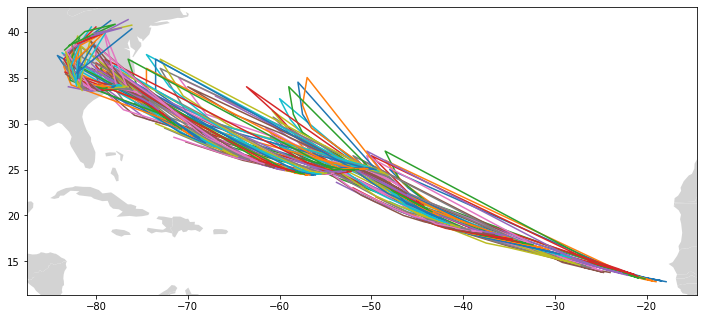

In [25]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

for tracks in storm_advisory_track.linestrings.values():
    for linestring in tracks.values():
        axis.plot(*linestring.xy)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

# USGS high-water mark surveys

#### the `.flood_event` property is a shortcut to create a new `USGS_Event` object that gives accessors for data like high-water marks
https://stormevents.readthedocs.io/en/latest/stormevent.html#stormevents.usgs.events.USGS_Event

In [26]:
storm.flood_event

USGS_StormEvent(id=283)

to retrieve high water marks you can just call the `.high_water_marks()` method of the USGS event object

In [27]:
hwm = storm.flood_event.high_water_marks()
hwm.loc[~pandas.isna(hwm['height_above_gnd']), ['height_above_gnd', 'geometry']]

,height_above_gnd,geometry
hwm_id,,
33497,0.00,POINT (-78.93694 33.69972)
33498,0.00,POINT (-78.79278 33.75861)
33499,0.00,POINT (-78.94778 33.64139)
33500,0.00,POINT (-78.97389 33.60250)
33501,0.00,POINT (-79.00333 33.57972)
...,...,...
34608,5.04,POINT (-79.87621 35.05510)
34840,2.41,POINT (-78.86857 34.14593)
34869,0.00,POINT (-76.62359 35.54000)


(32.372835835000004, 38.745447465)

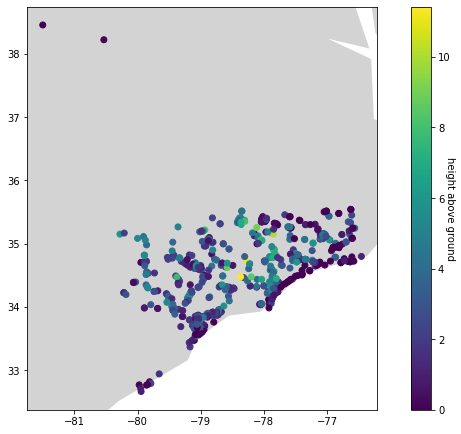

In [28]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

hwm.plot('height_above_gnd', ax=axis)
colorbar = pyplot.colorbar(
    ScalarMappable(
        norm=Normalize(
            vmin=hwm['height_above_gnd'].min(),
            vmax=hwm['height_above_gnd'].max(),
        ),
        cmap=get_cmap('viridis'),
    ),
)
colorbar.set_label('height above ground', rotation=270)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

# CO-OPS stations and data products

## data within an isotach wind swath
https://stormevents.readthedocs.io/en/latest/stormevent.html#stormevents.stormevent.StormEvent.coops_product_within_isotach

In [29]:
water_levels_within_34kt = storm.coops_product_within_isotach('water_level', wind_speed=34)
water_levels_within_34kt

/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


<xarray.Dataset>
Dimensions:  (nos_id: 10, t: 4621)
Coordinates:
  * nos_id   (nos_id) int64 8662245 8661070 8670870 ... 8654467 8665530 8656483
  * t        (t) datetime64[ns] 2018-08-30T06:00:00 ... 2018-09-18T12:00:00
    nws_id   (nos_id) <U5 'NITS1' 'MROS1' 'FPKG1' ... 'HCGN7' 'CHTS1' 'BFTN7'
    x        (nos_id) float64 -79.19 -78.94 -80.88 ... -75.69 -79.94 -76.69
    y        (nos_id) float64 33.34 33.66 32.03 34.22 ... 35.22 32.78 34.72
Data variables:
    v        (nos_id, t) float32 2.138 2.109 2.078 2.047 ... 1.03 1.021 1.01
    s        (nos_id, t) float32 0.004 0.005 0.004 0.004 ... 0.002 0.003 0.002
    f        (nos_id, t) object '0,0,0,0' '0,0,0,0' ... '0,0,0,0' '0,0,0,0'
    q        (nos_id, t) object 'v' 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'

/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
/home/zrb/environments/StormEvents_jupyter/lib/python3.10/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


(12.652547597146976, 37.849145549426225)

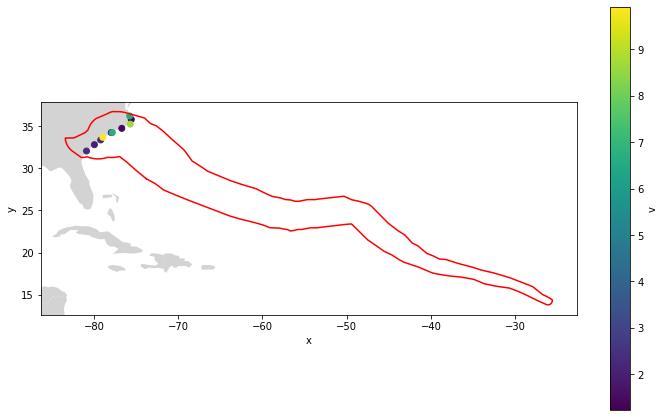

In [30]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

axis.plot(*storm.track().wind_swaths(wind_speed=34)['BEST']['20180830T060000'].exterior.xy, c='red')
water_levels_within_34kt.mean('t').plot.scatter(x='x', y='y', hue='v', cmap='viridis', ax=axis)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

## data within an arbitrary polygon
https://stormevents.readthedocs.io/en/latest/stormevent.html#stormevents.stormevent.StormEvent.coops_product_within_region

In [31]:
region = shapely.geometry.box(-85, 25, -65, 45)
water_levels = storm.coops_product_within_region('water_level', region=region)
water_levels

<xarray.Dataset>
Dimensions:  (t: 4621, nos_id: 111)
Coordinates:
  * t        (t) datetime64[ns] 2018-08-30T06:00:00 ... 2018-09-18T12:00:00
  * nos_id   (nos_id) int64 9044036 9075035 9052076 ... 8720625 8423898 8726667
    nws_id   (nos_id) <U5 'FWNM4' 'ESVM4' 'OCTN6' ... 'RCYF1' 'FTPN3' 'MCYF1'
    x        (nos_id) float64 -83.06 -83.88 -78.75 ... -81.56 -70.69 -82.44
    y        (nos_id) float64 42.31 43.62 43.34 42.09 ... 37.03 29.8 43.06 27.91
Data variables:
    v        (nos_id, t) float32 175.3 175.3 175.3 175.3 ... 1.004 1.011 1.009
    s        (nos_id, t) float32 0.001 0.001 0.0 0.0 ... 0.002 0.002 0.001 0.003
    f        (nos_id, t) object '0,0,0,0' '0,0,0,0' ... '0,0,0,0' '0,0,0,0'
    q        (nos_id, t) object 'v' 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'

(24.0, 46.0)

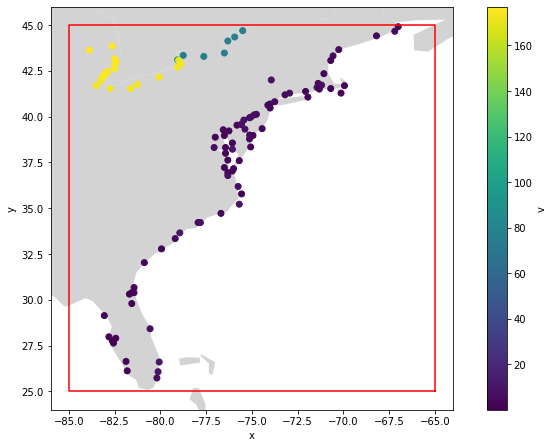

In [32]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

axis.plot(*region.exterior.xy, c='red')
water_levels.mean('t').plot.scatter(x='x', y='y', hue='v', cmap='viridis', ax=axis)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

# additional documentation
https://stormevents.readthedocs.io
https://github.com/oceanmodeling/StormEvents
